** *texte en italique*Master IASD**  
By REZKELLAH Fatma Zohra


**Deep Learning for Image Analisis**

Practical Session #1

In this practical work we seek to compare the performance of different models in the supervised classification task.

Santiago VELASCO-FORERO

Santiago.Velasco@mines-paristech.fr

Deadline: Oct 10 / 2024

In [1]:
#pip install --upgrade keras
#import os
#os.environ["KERAS_BACKEND"] = "jax"
#os.environ["KERAS_BACKEND"] = "pytorch"
#os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
print(keras.__version__)

3.4.1


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


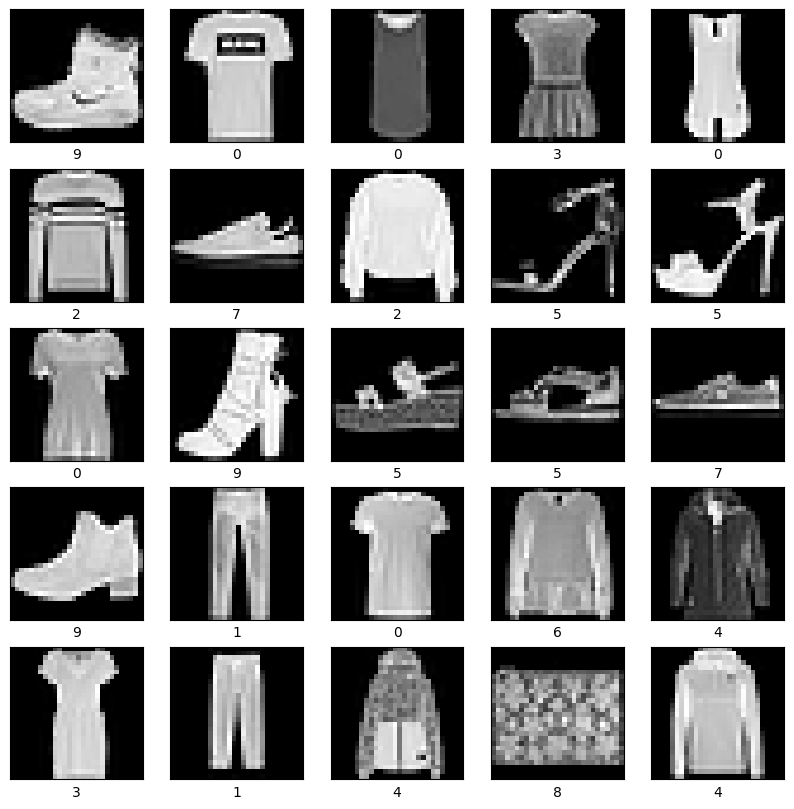

(28, 28)


In [2]:
#Fashion_MNIST
#https://en.wikipedia.org/wiki/Fashion_MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images=train_images/255.
test_images=test_images/255.

# Visualize some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

print(train_images[i].shape)

In [ ]:
input_shape=(28,28,1)
num_classes=10

def make_model(input_shape,num_classes):
  #input_shape: The shape of the input images, typically in the form (height, width, channels) where:
  #height is the image height,
  #width is the image width,
  #channels is the number of color channels (e.g., 3 for RGB images).
  #num_classes: The number of possible output categories (i.e., the number of classes for classification).
  input_layer=keras.Input(shape=input_shape)
  conv1=keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu")(input_layer)
  conv2=keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(conv1)
  pool=keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(conv2)
  conv3=keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(pool)
  conv4=keras.layers.Conv2D(96, kernel_size=(3, 3), activation="relu")(conv3)
  globalpool=keras.layers.GlobalAveragePooling2D()(conv4)
  dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)
  return keras.Model(input_layer,dense)

In [ ]:
model0 = make_model(input_shape,num_classes)
model0.summary()
optimizer = keras.optimizers.SGD(learning_rate=1.)
model0.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

Question 1: Explain for each layer how the number of parameters is calculated.

Answer 1: Include your answer here.

1. Conv2D: applying the formula ((Kernelsize* C_in)+ bias)* c_out= ((3*3)* 1 + 1)* 16 = 160
2. Conv2D1: the same forumula applies here: params= (9 * 16+1)*32
3. Maxpooling1: there is no training here so no leanrable params =0
4.Conv2d2: Applying the formula gives n= (9 * 32 + 1)* 64
5.Conv2d3: n = (9 * 64 +1)*96
6. global_avg_pooling: No learning here, so no trainable parameters
7. dense: n = 10 * 96 + 10 = 970

In [ ]:
num_epochs=36
history_model0 = model0.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.1024 - loss: 2.4123 - val_accuracy: 0.1013 - val_loss: 2.3072
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.1006 - loss: 2.3096 - val_accuracy: 0.1003 - val_loss: 2.3064
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0968 - loss: 2.3101 - val_accuracy: 0.1005 - val_loss: 2.3094
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1012 - loss: 2.3100 - val_accuracy: 0.0957 - val_loss: 2.3073
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1035 - loss: 2.3093 - val_accuracy: 0.0983 - val_loss: 2.3182
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0996 - loss: 2.3095 - val_accuracy: 0.1013 - val_loss: 2.3074
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1011 - loss: 2.3100 - val_accuracy: 0.0995 - val_loss: 2.3058
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1009 - loss: 2.310

In [8]:
def make_plot_history(history):
  #Visualize the training process of a neural network by plotting the accuracy and loss over the training epochs for both the training set and validation set.
  #It uses Matplotlib, a popular plotting library in Python, to generate two subplots: one for accuracy and one for loss.
  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'],label='Training')
  plt.plot(history.history['val_accuracy'],label='Validation')
  plt.grid('on')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.subplot(2,1,2)
  plt.plot(history.history['loss'],label='Training')
  plt.plot(history.history['val_loss'],label='Validation')
  plt.grid('on')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def make_model_analysis(model,x_test,y_test):
  #Function is designed to evaluate a trained neural network model by predicting the classes of test data (x_test) and comparing them to the true labels (y_test).
  #It also generates a classification report that provides detailed performance metrics for each class.
  #classification_report: This function (from Scikit-learn) generates a detailed report of the model’s performance for each class. It includes the following metrics:
  #Precision: The ratio of true positive predictions to the total predicted positives.
  #Recall (Sensitivity): The ratio of true positive predictions to the total actual positives.
  #F1-score: The harmonic mean of precision and recall.
  #Support: The number of true instances for each class.
  y_pred=np.argmax(model.predict(x_test),axis=1)
  print(y_pred.shape)
  print('Predicted Classes', np.unique(y_pred))
  print('Truth Classes', np.unique(y_test))
  target_names = ['T-Shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
  print(classification_report(y_test,y_pred,target_names=target_names))

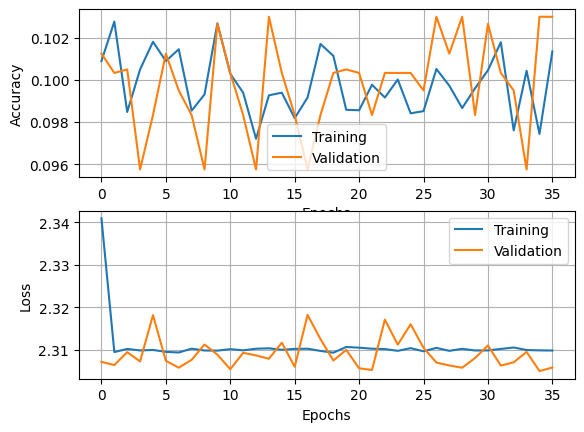

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,)
Predicted Classes [0]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.10      1.00      0.18      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.00      0.00      0.00      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle Boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
make_plot_history(history_model0)
make_model_analysis(model0,test_images,test_labels)

Note: The model is not learning.

Q1. Change the learning_rate to a value of 0.001 and train a new model. Call this new model: model1

In [ ]:
#Your code for answer Q1:
model1 = make_model(input_shape,num_classes)
model1.summary()
optimizer = keras.optimizers.SGD(learning_rate=0.001)  #COMPLETE HERE
model1.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model1 = model1.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1095 - loss: 2.2976 - val_accuracy: 0.2159 - val_loss: 2.2839
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.2021 - loss: 2.2780 - val_accuracy: 0.2187 - val_loss: 2.2514
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2057 - loss: 2.2404 - val_accuracy: 0.1696 - val_loss: 2.1908
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2438 - loss: 2.1584 - val_accuracy: 0.4454 - val_loss: 1.9456
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4620 - loss: 1.7444 - val_accuracy: 0.5631 - val_loss: 1.1644
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5706 - loss: 1.1349 - val_accuracy: 0.6386 - val_loss: 0.9887
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6080 - loss: 1.0265 - val_accuracy: 0.6598 - val_loss: 0.9333
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6266 - loss: 0.9818 

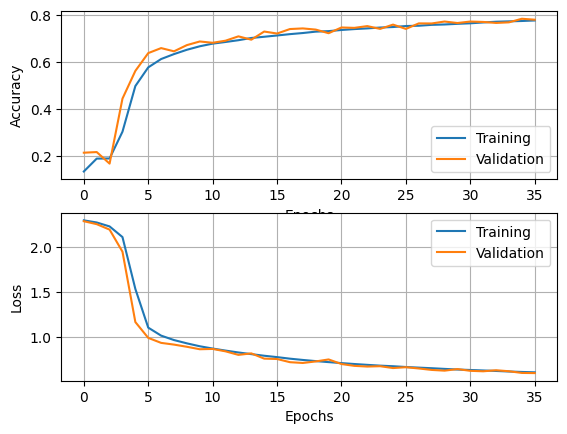

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.75      0.78      0.76      1000
     Trouser       0.95      0.92      0.93      1000
    Pullover       0.52      0.71      0.60      1000
       Dress       0.78      0.79      0.79      1000
        Coat       0.73      0.45      0.56      1000
      Sandal       0.91      0.90      0.91      1000
       Shirt       0.37      0.38      0.37      1000
     Sneaker       0.86      0.89      0.88      1000
         Bag       0.93      0.91      0.92      1000
  Ankle Boot       0.92      0.92      0.92      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



In [ ]:
make_plot_history(history_model1)
make_model_analysis(model1,test_images,test_labels)

Q2. Change the optimizer from SGD to Adam. Call this model as "model2".

In [ ]:
#Your code for answer Q2:
model2 = make_model(input_shape,num_classes)
model2.summary()
optimizer = 'Adam' #COMPLETE HERE
model2.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,658 (311.16 KB)

 Trainable params: 79,658 (311.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model2 = model2.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6391 - loss: 0.9646 - val_accuracy: 0.8077 - val_loss: 0.5378
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8109 - loss: 0.5249 - val_accuracy: 0.8410 - val_loss: 0.4526
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8505 - loss: 0.4163 - val_accuracy: 0.8522 - val_loss: 0.3960
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8678 - loss: 0.3634 - val_accuracy: 0.8712 - val_loss: 0.3535
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8800 - loss: 0.3277 - val_accuracy: 0.8730 - val_loss: 0.3473
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8927 - loss: 0.2974 - val_accuracy: 0.8960 - val_loss: 0.2936
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9003 - loss: 0.2731 - val_accuracy: 0.8925 - val_loss: 0.2984
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9073 - loss: 0.2614 

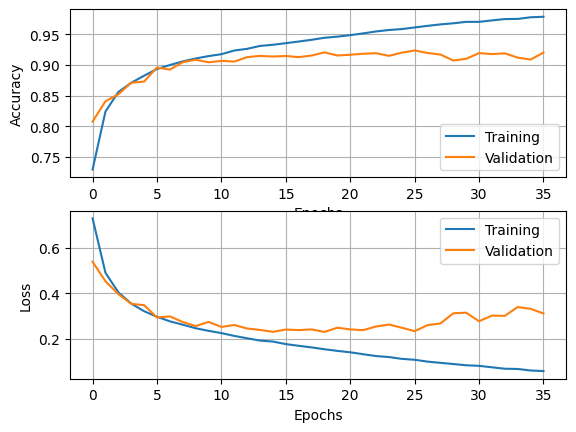

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.81      0.87      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.84      0.90      0.87      1000
       Dress       0.94      0.89      0.91      1000
        Coat       0.90      0.86      0.88      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.77      0.73      0.75      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
make_plot_history(history_model2)
make_model_analysis(model2,test_images,test_labels)

Q3: What is your analysis about the performance of Model2?

Answer Q3:
The model 2 performance is a way better than the first model, and it's perfroming well based on the performance metrics and loss/accuracy plots. This is due to:


* Learning Rate: A learning rate of 1 is extremely high for most models. It can cause the model's weights to update too drastically, potentially overshooting the optimal values during training. This leads to unstable training, where the loss may fluctuate or fail to decrease, resulting in poor performance. By reducing the learning rate to 0.001, the model makes smaller, more controlled updates, allowing it to converge toward a better solution.

* Optimizer: The SGD (Stochastic Gradient Descent) optimizer updates the weights based on the gradient of the loss function, but it can struggle with noisy gradients, getting stuck in local minima, or being slow to converge, especially without momentum or other modifications. The Adam optimizer (Adaptive Moment Estimation), on the other hand, combines the benefits of both SGD with momentum and RMSprop (another optimizer). It adapts the learning rate for each parameter based on estimates of the first and second moments of the gradients, which helps it converge faster and more effectively in many scenarios, especially when the loss landscape is complex.




Q4: Create you create a function "make_model_with_layer_normalization" to define a model as before but adding "LayerNormalization" layer in between each Conv2D and Activation layer. Call this model as "model3"

In [ ]:
def make_model_with_layer_normalization(input_shape, num_classes):
    input_layer = keras.Input(shape=input_shape)

    # First Conv2D block with LayerNormalization
    conv1 =keras.layers.Conv2D(16, kernel_size=(3, 3))(input_layer)
    norm1 = keras.layers.LayerNormalization()(conv1)
    act1 = keras.layers.Activation("relu")(norm1)

    # Second Conv2D block with LayerNormalization
    conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3))(act1)
    norm2 = keras.layers.LayerNormalization()(conv2)
    act2 = keras.layers.Activation("relu")(norm2)

    pool = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act2)

    # Third Conv2D block with LayerNormalization
    conv3 = keras.layers.Conv2D(64, kernel_size=(3, 3))(pool)
    norm3 = keras.layers.LayerNormalization()(conv3)
    act3 = keras.layers.Activation("relu")(norm3)

    # Fourth Conv2D block with LayerNormalization
    conv4 = keras.layers.Conv2D(96, kernel_size=(3, 3))(act3)
    norm4 = keras.layers.LayerNormalization()(conv4)
    act4 = keras.layers.Activation("relu")(norm4)

    # Global Average Pooling and Dense output layer
    globalpool = keras.layers.GlobalAveragePooling2D()(act4)
    dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)

    return keras.Model(input_layer, dense)

In [ ]:
model3 = make_model_with_layer_normalization(input_shape,num_classes)
model3.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 26, 26, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 24, 24, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 10, 10, 64)          │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 8, 8, 96)            │             192 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,074 (312.79 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model3 = model3.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6873 - loss: 0.8838 - val_accuracy: 0.8251 - val_loss: 0.4742
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8370 - loss: 0.4419 - val_accuracy: 0.8667 - val_loss: 0.3658
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8699 - loss: 0.3609 - val_accuracy: 0.8746 - val_loss: 0.3466
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8806 - loss: 0.3242 - val_accuracy: 0.8952 - val_loss: 0.2875
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8986 - loss: 0.2802 - val_accuracy: 0.8963 - val_loss: 0.2848
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9011 - loss: 0.2711 - val_accuracy: 0.8982 - val_loss: 0.2705
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9105 - loss: 0.2454 - val_accuracy: 0.9065 - val_loss: 0.2548
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9177 - loss: 0.2318 

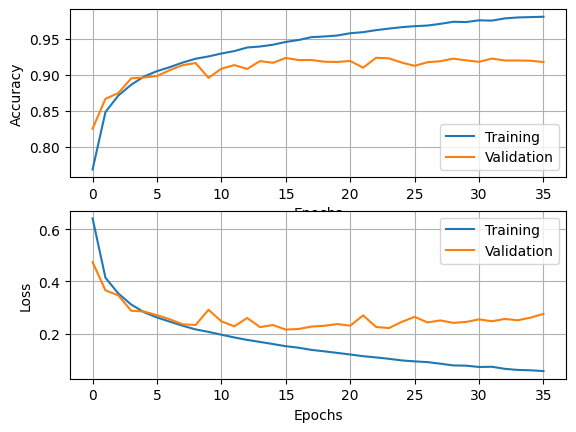

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.86      0.87      0.87      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.86      0.91      0.88      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.90      0.86      0.88      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.80      0.72      0.76      1000
     Sneaker       0.90      1.00      0.95      1000
         Bag       0.94      0.99      0.97      1000
  Ankle Boot       0.99      0.92      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:

make_plot_history(history_model3)
make_model_analysis(model3,test_images,test_labels)

Text(0, 0.5, 'Validation Accuracy')

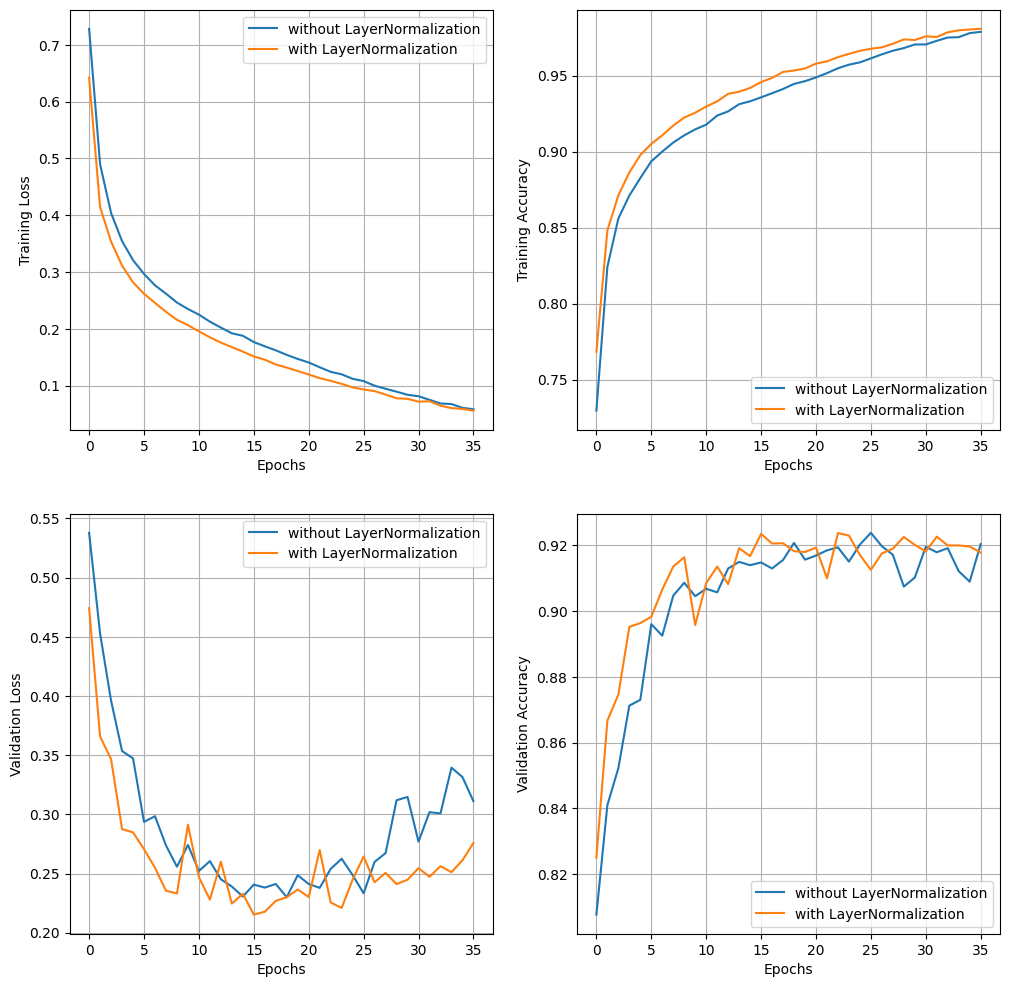

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(history_model2.history['loss'],label='without LayerNormalization')
plt.plot(history_model3.history['loss'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.subplot(2,2,2)
plt.plot(history_model2.history['accuracy'],label='without LayerNormalization')
plt.plot(history_model3.history['accuracy'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.subplot(2,2,3)
plt.plot(history_model2.history['val_loss'],label='without LayerNormalization')
plt.plot(history_model3.history['val_loss'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.subplot(2,2,4)
plt.plot(history_model2.history['val_accuracy'],label='without LayerNormalization')
plt.plot(history_model3.history['val_accuracy'],label='with LayerNormalization')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

Q5: What is your analysis about the performance of Model3?


Answer Q5:


When comparing the performance of Model 3 (which includes LayerNormalization) to the base model (without LayerNormalization), there are a few key factors to consider that explain why Model 3 generally performs better:
*  LayerNormalization normalizes the activations across the features of each layer, which helps in stabilizing the learning process. This is especially useful in deep networks where small changes in the earlier layers can cause large differences in later layers. Without LayerNormalization: The activations are not standardized across layers, which may cause issues such as exploding or vanishing gradients, especially in deeper layers.

* Model 3 likely shows faster convergence during training because LayerNormalization reduces the internal covariate shift, which is a change in the distribution of layer inputs as the parameters change. This allows the optimizer to operate more effectively and make steady progress toward minimizing the loss.

Q6: Create you create a function "make_model_with_layer_normalization_and_dropout" to define a model as before but including a dropout layer after global pooling. Call this model as "model4"

In [ ]:
def make_model_with_layer_normalization_and_dropout(input_shape, num_classes):
    input_layer = keras.Input(shape=input_shape)

    # First Conv2D block with LayerNormalization
    conv1 = keras.layers.Conv2D(16, kernel_size=(3, 3))(input_layer)
    norm1 = keras.layers.LayerNormalization()(conv1)
    act1 = keras.layers.Activation("relu")(norm1)

    # Second Conv2D block with LayerNormalization
    conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3))(act1)
    norm2 = keras.layers.LayerNormalization()(conv2)
    act2 = keras.layers.Activation("relu")(norm2)

    pool = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act2)

    # Third Conv2D block with LayerNormalization
    conv3 = keras.layers.Conv2D(64, kernel_size=(3, 3))(pool)
    norm3 = keras.layers.LayerNormalization()(conv3)
    act3 = keras.layers.Activation("relu")(norm3)

    # Fourth Conv2D block with LayerNormalization
    conv4 = keras.layers.Conv2D(96, kernel_size=(3, 3))(act3)
    norm4 = keras.layers.LayerNormalization()(conv4)
    act4 = keras.layers.Activation("relu")(norm4)

    # Global Average Pooling
    globalpool = keras.layers.GlobalAveragePooling2D()(act4)

    # Dropout layer after global pooling
    dropout = keras.layers.Dropout(0.1)(globalpool)

    # Dense output layer
    dense = keras.layers.Dense(num_classes, activation="softmax")(dropout)

    return keras.Model(input_layer, dense)

In [ ]:
model4 = make_model_with_layer_normalization_and_dropout(input_shape,num_classes)
model4.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 26, 26, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_5                │ (None, 24, 24, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_6                │ (None, 10, 10, 64)          │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_7                │ (None, 8, 8, 96)            │             192 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,074 (312.79 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_model4 = model4.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
    )

Epoch 1/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6788 - loss: 0.8921 - val_accuracy: 0.8341 - val_loss: 0.4653
Epoch 2/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8336 - loss: 0.4542 - val_accuracy: 0.8676 - val_loss: 0.3766
Epoch 3/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8617 - loss: 0.3824 - val_accuracy: 0.8808 - val_loss: 0.3327
Epoch 4/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8787 - loss: 0.3425 - val_accuracy: 0.8859 - val_loss: 0.3222
Epoch 5/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8857 - loss: 0.3167 - val_accuracy: 0.8955 - val_loss: 0.2859
Epoch 6/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8984 - loss: 0.2848 - val_accuracy: 0.9019 - val_loss: 0.2734
Epoch 7/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9027 - loss: 0.2678 - val_accuracy: 0.9097 - val_loss: 0.2513
Epoch 8/36
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9096 - loss: 0.2516 

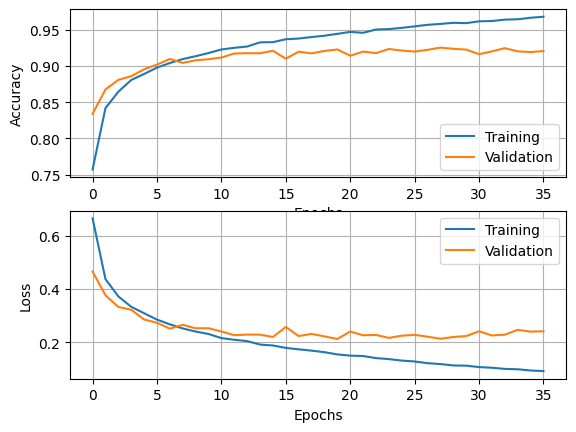

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.89      0.85      0.87      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.87      0.90      0.89      1000
       Dress       0.85      0.96      0.90      1000
        Coat       0.92      0.82      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.76      0.77      0.76      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
make_plot_history(history_model4)
make_model_analysis(model4,test_images,test_labels)

Q7: Select the best configuration and train this network for 128 epochs, including:
- A reduced learning rate and an early stopping callback.
- Save the best model.
- Plot the confusion matrix of the best model.
- Show examples where the network is not classifing correctly.

Help: https://keras.io/api/callbacks/


In [ ]:
#Include the answer of the Q7

num_epochs=128

model_best = model4 ## COMPLETE HERE
model_best.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_best.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1) ##COMPLETE
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1) ##COMPLETE

history_model5 = model_best.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs=num_epochs,
        callbacks=[reduce_lr,early_stopping]
    )


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 26, 26, 16)          │              32 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_5                │ (None, 24, 24, 32)          │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_6                │ (None, 10, 10, 64)          │             128 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_7                │ (None, 8, 8, 96)            │             192 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,224 (938.38 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,150 (625.59 KB)

Epoch 1/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9708 - loss: 0.0841 - val_accuracy: 0.9228 - val_loss: 0.2366 - learning_rate: 0.0010
Epoch 2/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9703 - loss: 0.0840 - val_accuracy: 0.9227 - val_loss: 0.2362 - learning_rate: 0.0010
Epoch 3/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9719 - loss: 0.0789 - val_accuracy: 0.9228 - val_loss: 0.2301 - learning_rate: 0.0010
Epoch 4/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9745 - loss: 0.0729 - val_accuracy: 0.9231 - val_loss: 0.2335 - learning_rate: 0.0010
Epoch 5/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9740 - loss: 0.0763 - val_accuracy: 0.9260 - val_loss: 0.2268 - learning_rate: 0.0010
Epoch 6/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9739 - loss: 0.0735 - val_accuracy: 0.9193 - val_loss: 0.2589 - learning_rate: 0.0010
Epoch 7/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0

In [ ]:
model_best.save('model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


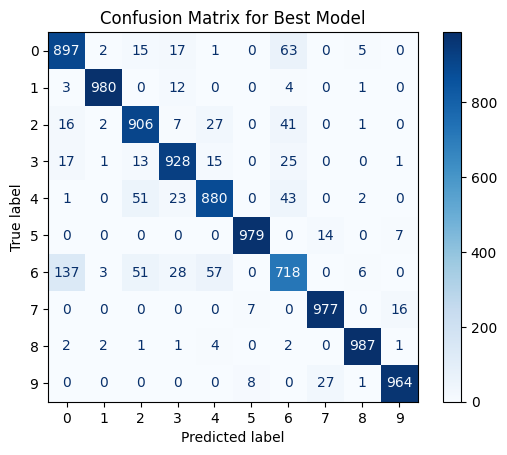

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test data
predictions = model_best.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix

cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Best Model")
plt.show()

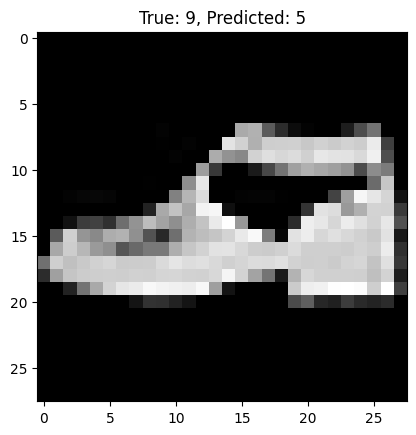

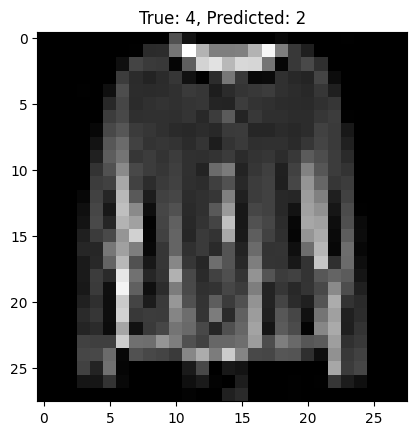

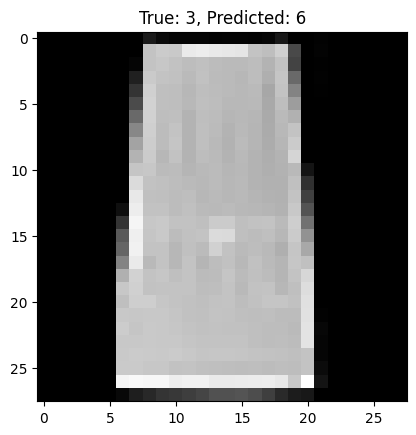

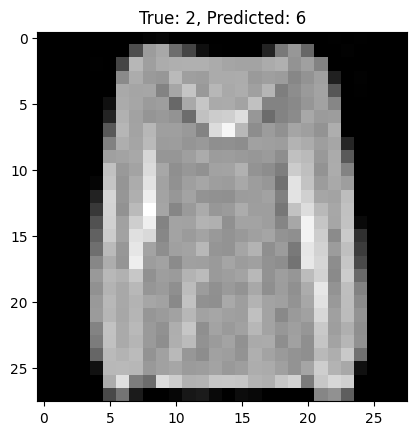

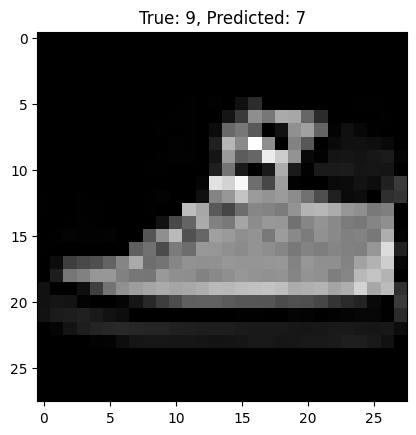

In [ ]:
# Show some examples where the model misclassified
incorrect_indices = np.where(predicted_labels != test_labels)[0]
num_show = 5  # Number of misclassified examples to show

for i in range(num_show):
    index = incorrect_indices[i]
    plt.imshow(test_images[index], cmap='gray')  # Show the image
    plt.title(f"True: {test_labels[index]}, Predicted: {predicted_labels[index]}")
    plt.show()

# Other Questions:


Q8. In your final model "model_best", retrain the model using "batch normalization layer" instead of "layer normalization".
(The code is at the end of the notebook)

a. Does this model get better results for this problem?
In this case, the results didn't get better in terms of performance metrics and convergence of the model.

b. Explain why the model with Batch Normalization has fewer parameters than the one using Layer Normalization.

answer:
b - In Batch Normalization, the number of learnable parameters depends only on the number of channels (filters), which means two parameters per channel (for γ and β). Therefore, for a convolutional layer with 64 filters, there will be 128 parameters (64 for γ and 64 for β).

In Layer Normalization, the number of learnable parameters depends on the total number of neurons in the feature map, which is the product of the height, width, and number of channels. For example, for a feature map of size 28x28 with 64 filters, there will be
28*28*64=50,176 so there will be 100,352 learnable parameters (50,176 for
γ and 50,176 for β).

Q9. Which of these techniques can be applied to reduce model overfitting?

1. Layer Normalization
2. Changing SGD by ADAM as optimizer
3. **Dropout**
4. **Data augmentation**

Q10. Which of these statements about dropout is correct?

1. Dropout results in sparsity within the trained weights.
2. During testing, dropout is implemented using the inverted keep probability.
3. Increasing the keep probability of a layer enhances the regularization of its weights.
**4. None of the above.**

Q11. Given the following activation function
$
\texttt{LeakyReLU}(x)=
x \texttt{ if } x>0,
\alpha x \texttt{ if } x≤0
​$.

1. Derive the first derivative with respect to $x$.

2. What is the behavior of the derivative when $\alpha$ goes to zero?

3. How does this can affect backpropagation?

Given the activation function:


### 1. Deriving the First Derivative

To find the first derivative, we consider the two cases:

- For \( x > 0 \):
  d/dx(leakyrelu(x)) = 1

- For \( x <= 0 \):
 /dx(leakyrelu(x)) = alpha

Combining these results, the first derivative of the Leaky ReLU function can be expressed as:

d/dx (LeakyReLU)(x) =
\begin{cases}
1 & \text{if } x > 0 \\
\alpha & \text{if } x \leq 0
\end{cases}

### 2. Behavior of the Derivative When \(\alpha\) Goes to Zero

As alpha approaches zero, the derivative for x<=0 becomes:

/dx(leakyrelu(x)) = alpha --> 0

This means that for values of x<=0, the slope of the Leaky ReLU activation function approaches zero, making it similar to the **standard ReLU** (Rectified Linear Unit), which has a zero derivative for all negative inputs.

### 3. How This Can Affect Backpropagation

The behavior of the derivative has significant implications for backpropagation:

- **Gradient Flow**: If alpha is small (approaching zero), the derivative for  x<=0 will also be small. Consequently, during backpropagation, gradients for neurons with negative inputs will be minimal, leading to little to no updates for those weights. This can result in dead neurons, similar to what happens with standard ReLU, where neurons can stop learning if they become inactive.

- **Training Dynamics**: A low alpha value can hinder the learning process, especially for features that are negatively activated. This can lead to slower convergence or even getting stuck in suboptimal local minima, as the network may not be effectively updating weights associated with those negative activations.


#ExtraPoints :

Q12. Given these two activation functions $\texttt{sigmoid}=\frac{1}{1+\exp(-x)}$ and $\texttt{tanh}(x) = \frac{\exp(x)−\exp(−x)}{\exp(x)+\exp(−x)}$



Show for what value of $a,b$, $ a\texttt{sigmoid}(2x) - b = \texttt{tanh}(x)$
answer:
sigmoid(2x) = 1/(1+exp(-2x))
tanh(x) = (exp(x) - exp(-x))/(exp(x) + exp(-x))

We want to find a and b such that:
a. sigmoid(2x) - b = tanh(x)
a. (1/(1+exp(-2x))) = (exp(x) - exp(-x))/(exp(x) + exp(-x))

a⋅(exp(x)+exp(−x))−b⋅(1+exp(−2x))=(exp(x)−exp(−x))(1+exp(−2x)) -->

a⋅(exp(x)+exp(−x))−b−b⋅exp(−2x)=exp(x)−exp(−x)+exp(−x−2x)−exp(x−2x)

By identification, we get (a,b) = (1,0)

Q13. Given this two well known activation functions:

$\texttt{swish}(x,\beta)= x \texttt{sigmoid}(\beta x)= \frac{x}{1+ \exp^{-\beta x}}$

and,

$\texttt{Relu}(x)=\max(x,0)$

Show that $\texttt{swish}(x,\beta)\to \texttt{Relu}(x)$ when $\beta \to \infty$

Answer:
Consider two cases for x:

Case 1: x>0

When
x is positive, the exponential term e(−βx) in the sigmoid function approaches zero as  β→∞. This is because e(−βx)→0 for large β when x>0.

Hence, the sigmoid function approaches 1:

sigmoid(𝛽𝑥)=1+𝑒(−𝛽𝑥)→1 as 𝛽→ ∞
Therefore, for x>0:

swish(𝑥,𝛽)=𝑥⋅sigmoid(𝛽𝑥)→𝑥⋅1=𝑥

This is exactly what ReLU does for

x>0:


ReLU(x)=x for x>0
Case 2:

x≤0

When x is negative or zero, e(−βx) becomes very large as
β→∞ because the exponent becomes positive. Therefore, the sigmoid function approaches zero:

sigmoid(𝛽𝑥)=1/(1+𝑒(−𝛽𝑥))→0 as 𝛽→∞
swish(𝑥,𝛽)=𝑥⋅sigmoid(𝛽𝑥)→𝑥⋅0=0

This matches the behavior of ReLU for x≤0:

ReLU(𝑥)=0 for 𝑥≤ 0

Conclusion:
As  β→∞, the Swish function behaves exactly like the ReLU function:


In [4]:
input_shape=(28,28,1)
num_classes=10
def make_model_with_batch_normalization(input_shape, num_classes):
    # Input layer
    input_layer = keras.Input(shape=input_shape)

    # First Conv2D block with Batch Normalization
    conv1 = keras.layers.Conv2D(16, kernel_size=(3, 3))(input_layer)
    norm1 = keras.layers.BatchNormalization()(conv1)  # Batch Normalization layer
    act1 = keras.layers.Activation("relu")(norm1)

    # Second Conv2D block with Batch Normalization
    conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3))(act1)
    norm2 = keras.layers.BatchNormalization()(conv2)  # Batch Normalization layer
    act2 = keras.layers.Activation("relu")(norm2)

    # Max Pooling layer
    pool = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(act2)

    # Third Conv2D block with Batch Normalization
    conv3 = keras.layers.Conv2D(64, kernel_size=(3, 3))(pool)
    norm3 = keras.layers.BatchNormalization()(conv3)  # Batch Normalization layer
    act3 = keras.layers.Activation("relu")(norm3)

    # Fourth Conv2D block with Batch Normalization
    conv4 = keras.layers.Conv2D(96, kernel_size=(3, 3))(act3)
    norm4 = keras.layers.BatchNormalization()(conv4)  # Batch Normalization layer
    act4 = keras.layers.Activation("relu")(norm4)

    # Global Average Pooling
    globalpool = keras.layers.GlobalAveragePooling2D()(act4)

    # Dense output layer
    dense = keras.layers.Dense(num_classes, activation="softmax")(globalpool)

    return keras.Model(input_layer, dense)

# Create the model
model_best = make_model_with_batch_normalization(input_shape, num_classes)
model_best.summary()

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_best.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 96)            │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 96)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,490 (314.41 KB)

 Trainable params: 80,074 (312.79 KB)

 Non-trainable params: 416 (1.62 KB)

In [5]:
history_model5 = model_best.fit(
        train_images, train_labels,
        validation_split=0.2,
        epochs= 128
    )

Epoch 1/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7563 - loss: 0.7205 - val_accuracy: 0.8446 - val_loss: 0.4345
Epoch 2/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8715 - loss: 0.3595 - val_accuracy: 0.8716 - val_loss: 0.3614
Epoch 3/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8903 - loss: 0.3059 - val_accuracy: 0.8587 - val_loss: 0.3803
Epoch 4/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9041 - loss: 0.2717 - val_accuracy: 0.8774 - val_loss: 0.3217
Epoch 5/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9097 - loss: 0.2535 - val_accuracy: 0.8907 - val_loss: 0.3033
Epoch 6/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9151 - loss: 0.2340 - val_accuracy: 0.9120 - val_loss: 0.2489
Epoch 7/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9232 - loss: 0.2170 - val_accuracy: 0.9059 - val_loss: 0.2549
Epoch 8/128
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9254 - lo

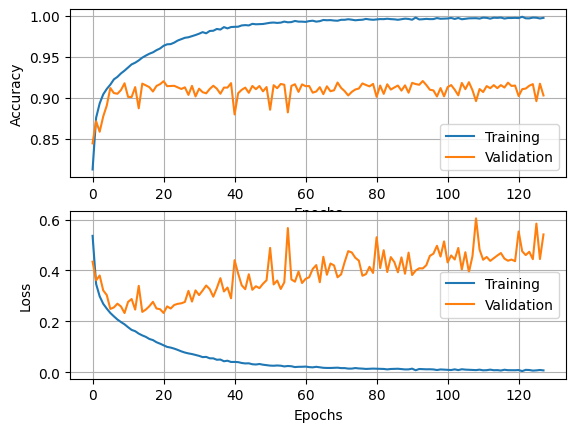

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
(10000,)
Predicted Classes [0 1 2 3 4 5 6 7 8 9]
Truth Classes [0 1 2 3 4 5 6 7 8 9]
              precision    recall  f1-score   support

     T-Shirt       0.84      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.94      0.73      0.82      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.72      0.94      0.82      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.79      0.69      0.73      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle Boot       0.95      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [10]:
make_plot_history(history_model5)
make_model_analysis(model_best,test_images,test_labels)